In [1]:
import uproot

In [10]:
filename = "tracksters_ds.root"
complete_ds = {filename: "tracksters/complete"}
incomplete_ds = {filename: "tracksters/incomplete"}
complete = uproot.open(complete_ds)
incomplete = uproot.open(incomplete_ds)

In [11]:
complete.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
nvertices_x          | int32_t                  | AsDtype('>i4')
vertices_x           | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_y          | int32_t                  | AsDtype('>i4')
vertices_y           | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_z          | int32_t                  | AsDtype('>i4')
vertices_z           | double[]                 | AsJagged(AsDtype('>f8'))
nvertices_e          | int32_t                  | AsDtype('>i4')
vertices_e           | double[]                 | AsJagged(AsDtype('>f8'))


In [14]:
cx = complete["vertices_x"].array()
cy = complete["vertices_y"].array()
cz = complete["vertices_z"].array()

ix = incomplete["vertices_x"].array()
iy = incomplete["vertices_y"].array()
iz = incomplete["vertices_z"].array()

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

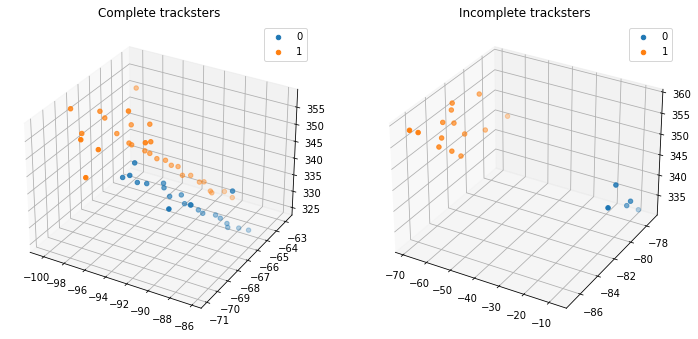

In [23]:
cx = complete["vertices_x"].array()
cy = complete["vertices_y"].array()
cz = complete["vertices_z"].array()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(121, projection='3d')
tids = [0, 1]
for tid in tids:
    ax.scatter(cx[tid], cy[tid], cz[tid], label=tid)
ax.set_title(f"Complete tracksters")
ax.legend()

ax = fig.add_subplot(122, projection='3d')
tids = [0, 1]
for tid in tids:
    ax.scatter(ix[tid], iy[tid], iz[tid], label=tid)
ax.set_title(f"Incomplete tracksters")
ax.legend()